# New York Airbnb EDA

## Paso 1: Recopilación de datos

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
# Definir la ruta donde se guardará el DataFrame en bruto

ruta_data_frame_bruto = r"C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-machine-learning-python-template/data/raw/total_data.csv"

# Guardar el DataFrame en formato CSV

total_data.to_csv(ruta_data_frame_bruto, index=False, encoding='utf-8')

In [3]:
# Crear una copia del DataFrame original

interim_data = total_data.copy()

# Verificar que la copia se ha realizado correctamente

interim_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Definir la ruta donde se guardará el DataFrame de datos intermedios

ruta_data_frame_intermedio = r"C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-machine-learning-python-template/data/interim/interim_data.csv"

# Guardar el DataFrame en formato CSV

total_data.to_csv(ruta_data_frame_intermedio, index=False, encoding='utf-8')

## Paso 2: Exploración y limpieza de datos

In [5]:
# Obtener las dimensiones

interim_data.shape

(48895, 16)

El DataFrame contiene 48.895 registros (filas) y 16 variables (columnas)

In [6]:
# Obtener información sobre tipos de datos y valores no nulos

interim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

🏗 **Consideraciones para Preprocesamiento**

- **Variables categóricas (`object`)**: `name`, `host_name`, `neighbourhood_group`, `neighbourhood`, `room_type`, `last_review`.

- **Variables numéricas (`int64`, `float64`)**: `price`, `minimum_nights`, `reviews_per_month`, `latitude`, `longitude`, etc.

- **Datos nulos importantes**:
  
  - `last_review` y `reviews_per_month` tienen **más de 10,000 valores faltantes**, lo que representa aproximadamente el **20% de los datos**.
  
  - `name` y `host_name` tienen pocos valores nulos y podrían ser completados o descartados según el análisis.

### Eliminar duplicados

In [7]:
print(f"El número de duplicados de registros ID es: {interim_data['id'].duplicated().sum()}")
print(f"El número de duplicados de registros Name es: {interim_data['name'].duplicated().sum()}")
print(f"El número de duplicados de registros Host ID es: {interim_data['host_id'].duplicated().sum()}")

El número de duplicados de registros ID es: 0
El número de duplicados de registros Name es: 989
El número de duplicados de registros Host ID es: 11438


No se eliminan duplicados porque cada registro corresponde a un ID único.

### Eliminar información irrelevante

In [8]:
interim_data.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)

interim_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## Paso 3: Análisis de variables univariante

### Análisis sobre variables categóricas

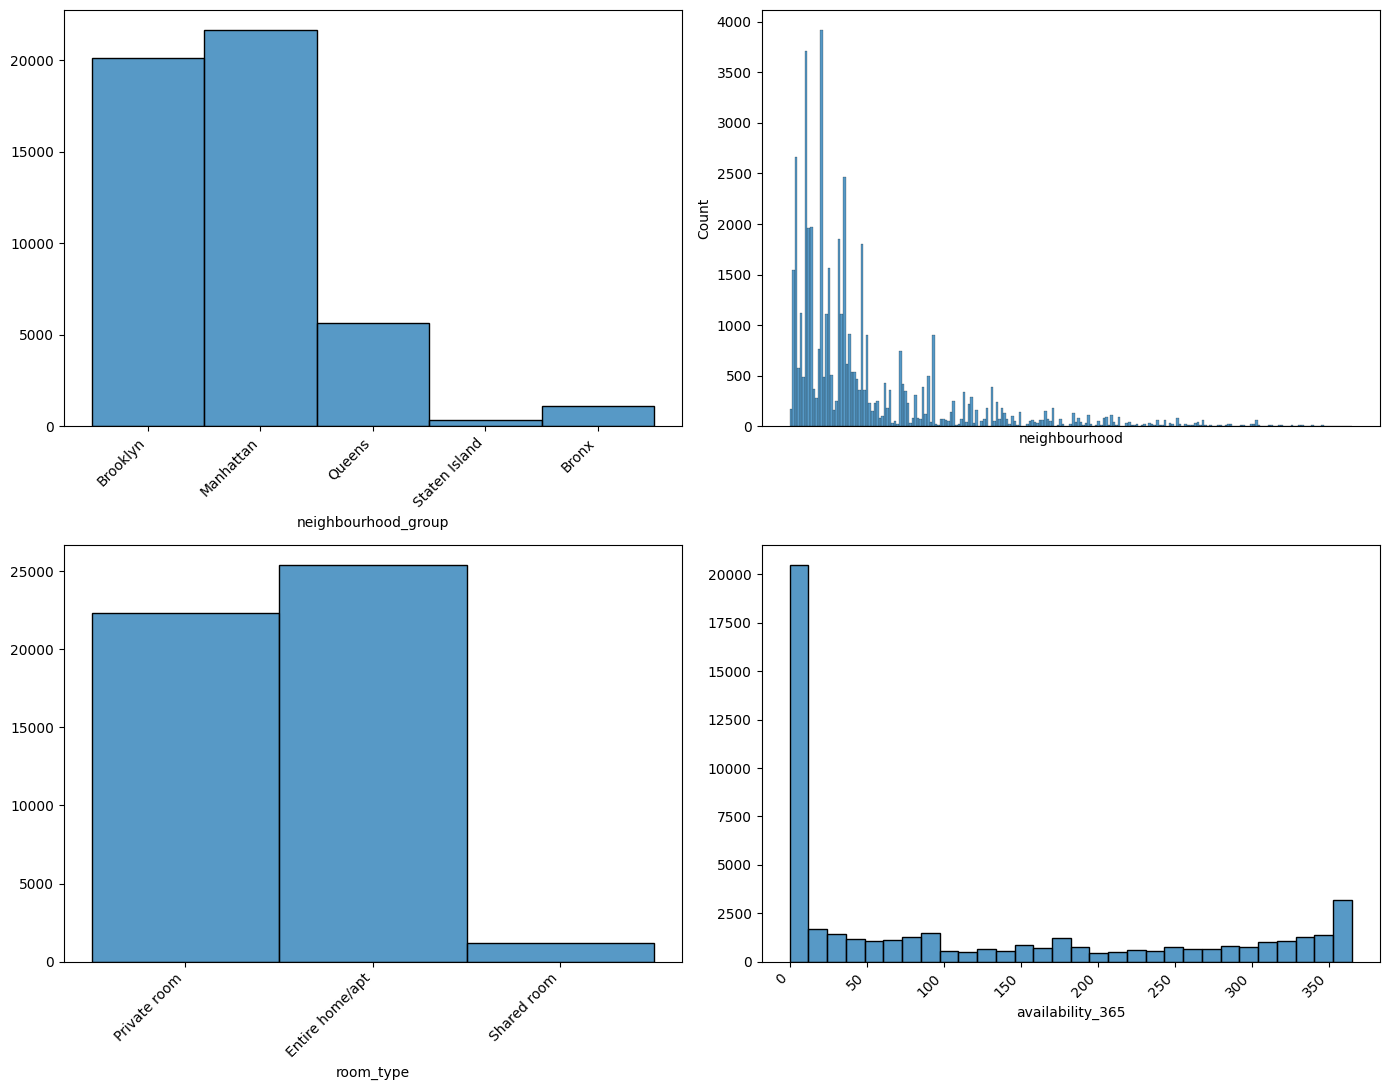

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize=(14, 11))  # Aumentar tamaño del gráfico

# Crear histogramas
sns.histplot(ax=axis[0,0], data = interim_data, x = "neighbourhood_group").set(ylabel=None)
sns.histplot(ax=axis[0,1], data = interim_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax=axis[1,0], data = interim_data, x = "room_type").set(ylabel=None)
sns.histplot(ax=axis[1,1], data = interim_data, x = "availability_365").set(ylabel=None)

# Rotar etiquetas en cada gráfico
for ax in axis.flatten():  
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotar etiquetas del eje x

plt.tight_layout()  # Ajustar layout para evitar superposición
plt.show()

- Tenemos 5 aréas o distritos: Brooklyn, Manhattan, Queens, Staten Island y Bronx. La mayoría de las ofertas se concentran en Manhattan y en Brooklyn.
- Hay más casas/apartamentos disponibles, que habitaciones privadas. Las habitaciones compartidas es la categorìa con menos frecuencia.
- La mayorìa de las habitaciones están disponibles los 365 días del año; sin embargo, hay muchos 0/Nan lo que puede sugerir un error o falta de información.

🏗 **Consideraciones para Preprocesamiento**

- **Variables categóricas (`object`)**: `neighbourhood_group`, `neighbourhood`, `room_type`, `availability_365`.

- **Variables numéricas (`int64`, `float64`)**: `price`, `minimum_nights`, `number_of_reviews`, `calculated_host_listings_count`.

### Análisis de variables númericas

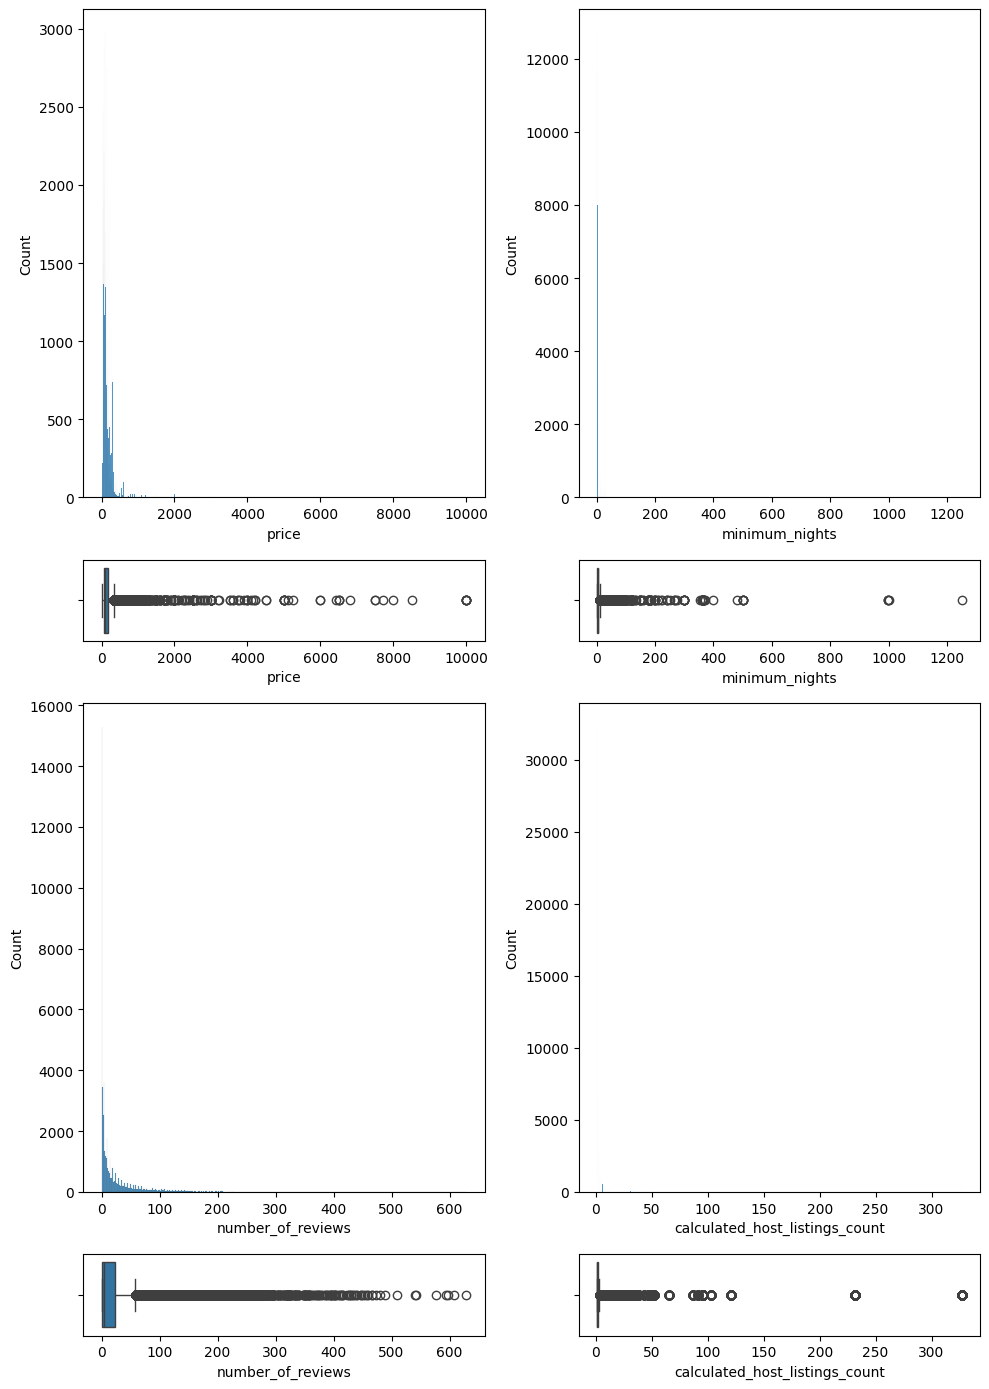

In [10]:
fig, axis = plt.subplots(4, 2, figsize=(10, 14), gridspec_kw = {"height_ratios": (6, 1, 6, 1)})

# Crear histogramas y boxplots

sns.histplot(ax=axis[0,0], data = interim_data, x = "price")
sns.boxplot(ax=axis[1,0], data = interim_data, x = "price")

sns.histplot(ax=axis[0,1], data = interim_data, x = "minimum_nights")
sns.boxplot(ax=axis[1,1], data = interim_data, x = "minimum_nights")

sns.histplot(ax=axis[2,0], data = interim_data, x = "number_of_reviews")
sns.boxplot(ax=axis[3,0], data = interim_data, x = "number_of_reviews")

sns.histplot(ax=axis[2,1], data = interim_data, x = "calculated_host_listings_count")
sns.boxplot(ax=axis[3,1], data = interim_data, x = "calculated_host_listings_count")

plt.tight_layout()  # Ajustar layout para evitar superposición
plt.show()

## Paso 4: Análisis de variables multivariantes

### Análisis numérico-numérico

*Price - (Minimum_nights, Number_of_reviews, Calculated_host_listings_count)*

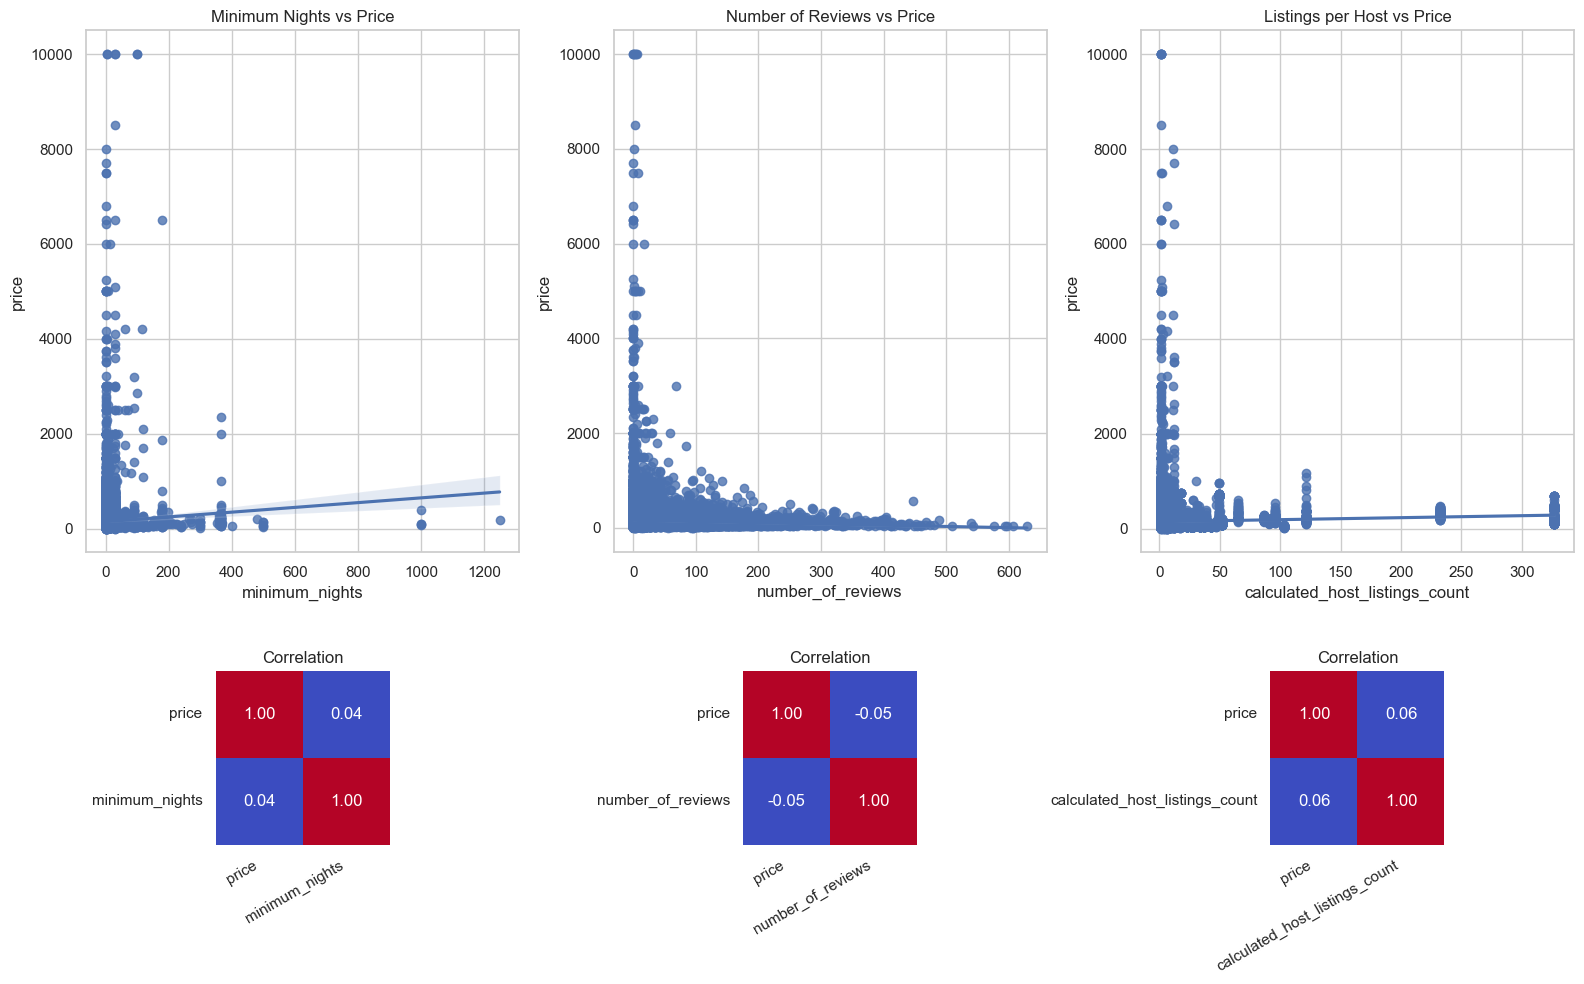

In [11]:
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

# Crear figura y ejes
fig, axis = plt.subplots(2, 3, figsize=(16, 10), gridspec_kw={"height_ratios": [3, 1]})

# ---------------------- SCATTERPLOTS ----------------------
sns.regplot(ax=axis[0, 0], data=interim_data, x="minimum_nights", y="price")
axis[0, 0].set_title("Minimum Nights vs Price")

sns.regplot(ax=axis[0, 1], data=interim_data, x="number_of_reviews", y="price")
axis[0, 1].set_title("Number of Reviews vs Price")

sns.regplot(ax=axis[0, 2], data=interim_data, x="calculated_host_listings_count", y="price")
axis[0, 2].set_title("Listings per Host vs Price")

# ---------------------- HEATMAPS ----------------------
sns.heatmap(interim_data[["price", "minimum_nights"]].corr(), 
            annot=True, fmt=".2f", ax=axis[1, 0], cbar=False, cmap="coolwarm", square=True)
axis[1, 0].set_title("Correlation")

sns.heatmap(interim_data[["price", "number_of_reviews"]].corr(), 
            annot=True, fmt=".2f", ax=axis[1, 1], cbar=False, cmap="coolwarm", square=True)
axis[1, 1].set_title("Correlation")

sns.heatmap(interim_data[["price", "calculated_host_listings_count"]].corr(), 
            annot=True, fmt=".2f", ax=axis[1, 2], cbar=False, cmap="coolwarm", square=True)
axis[1, 2].set_title("Correlation")

# Rotar etiquetas de los heatmaps solo si es necesario
for ax in axis[1]:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, ha="right")
    plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)

# Ajustar diseño
plt.tight_layout(h_pad=3)
plt.show()

- No hay relación entre el precio y el número mínimo de noches.
- No hay relación entre el precio y el número de reviews.
- No hay relación entre el precio y el recuento de listados de host calculados.

### Análisis categórico-categórico

*Room_type - Neighbourhood group*

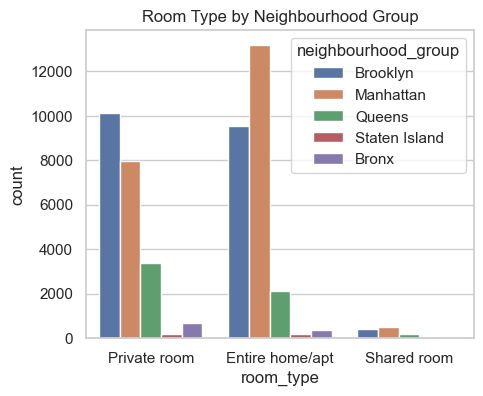

In [12]:
fig, axis = plt.subplots(figsize=(5, 4))

sns.countplot(data=interim_data, x="room_type", hue="neighbourhood_group")

plt.title("Room Type by Neighbourhood Group")

plt.show()

- Manhattan es el distrito que concentra el mayor número de lugares para alquilar, especificamente casas o apartamentos enteros.
- Brooklyn es el segundo distrito con más lugares para alquilar, especialmente habitaciones privadas.
- Queens y Bronx son el tercer y cuarto distrito, destacando en una mayor frecuencia en habitaciones privadas que en casas o apartamentos enteros.

### Análisis numérico-categórico (completo)

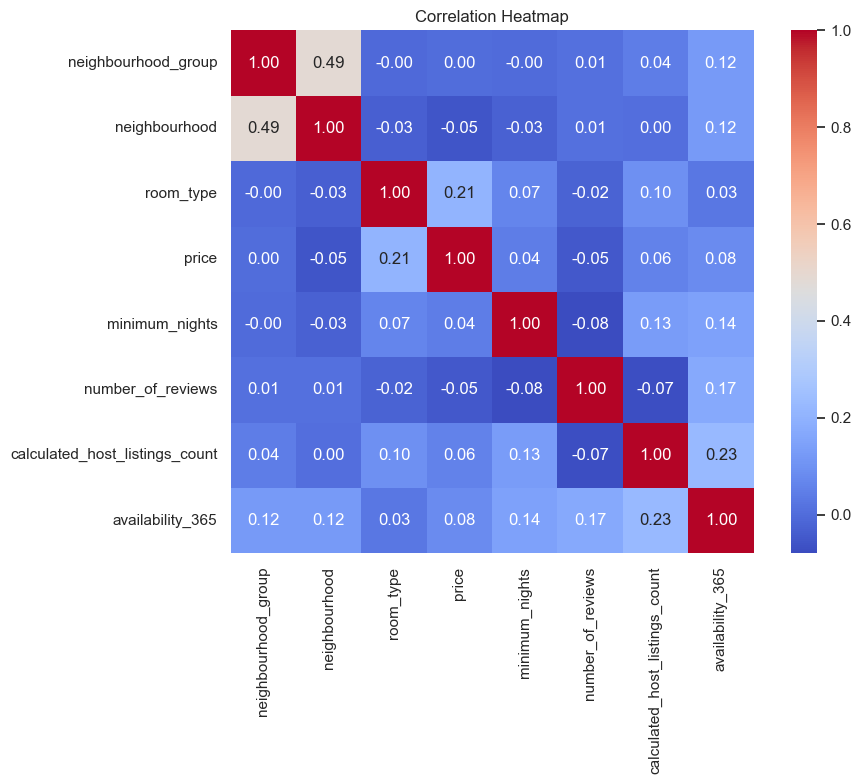

In [13]:
# Factorizar variables categóricas
interim_data["neighbourhood_group"] = pd.factorize(interim_data["neighbourhood_group"])[0]
interim_data["neighbourhood"] = pd.factorize(interim_data["neighbourhood"])[0]
interim_data["room_type"] = pd.factorize(interim_data["room_type"])[0]

# Seleccionar las columnas a incluir en el análisis
columns_to_include = [
    "neighbourhood_group",
    "neighbourhood",
    "room_type",
    "price",
    "minimum_nights",
    "number_of_reviews",
    "calculated_host_listings_count",
    "availability_365"
]

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(interim_data[columns_to_include].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**room_type es la variable más correlacionada con price**

- Correlación de 0.21 → positiva, pero baja.
- Implica que el tipo de habitación influye en el precio (como era de esperarse: habitaciones privadas vs. apartamentos enteros).
- Aunque no es una relación fuerte, es la más significativa en este conjunto.

### Analizar todos los datos simultáneamente

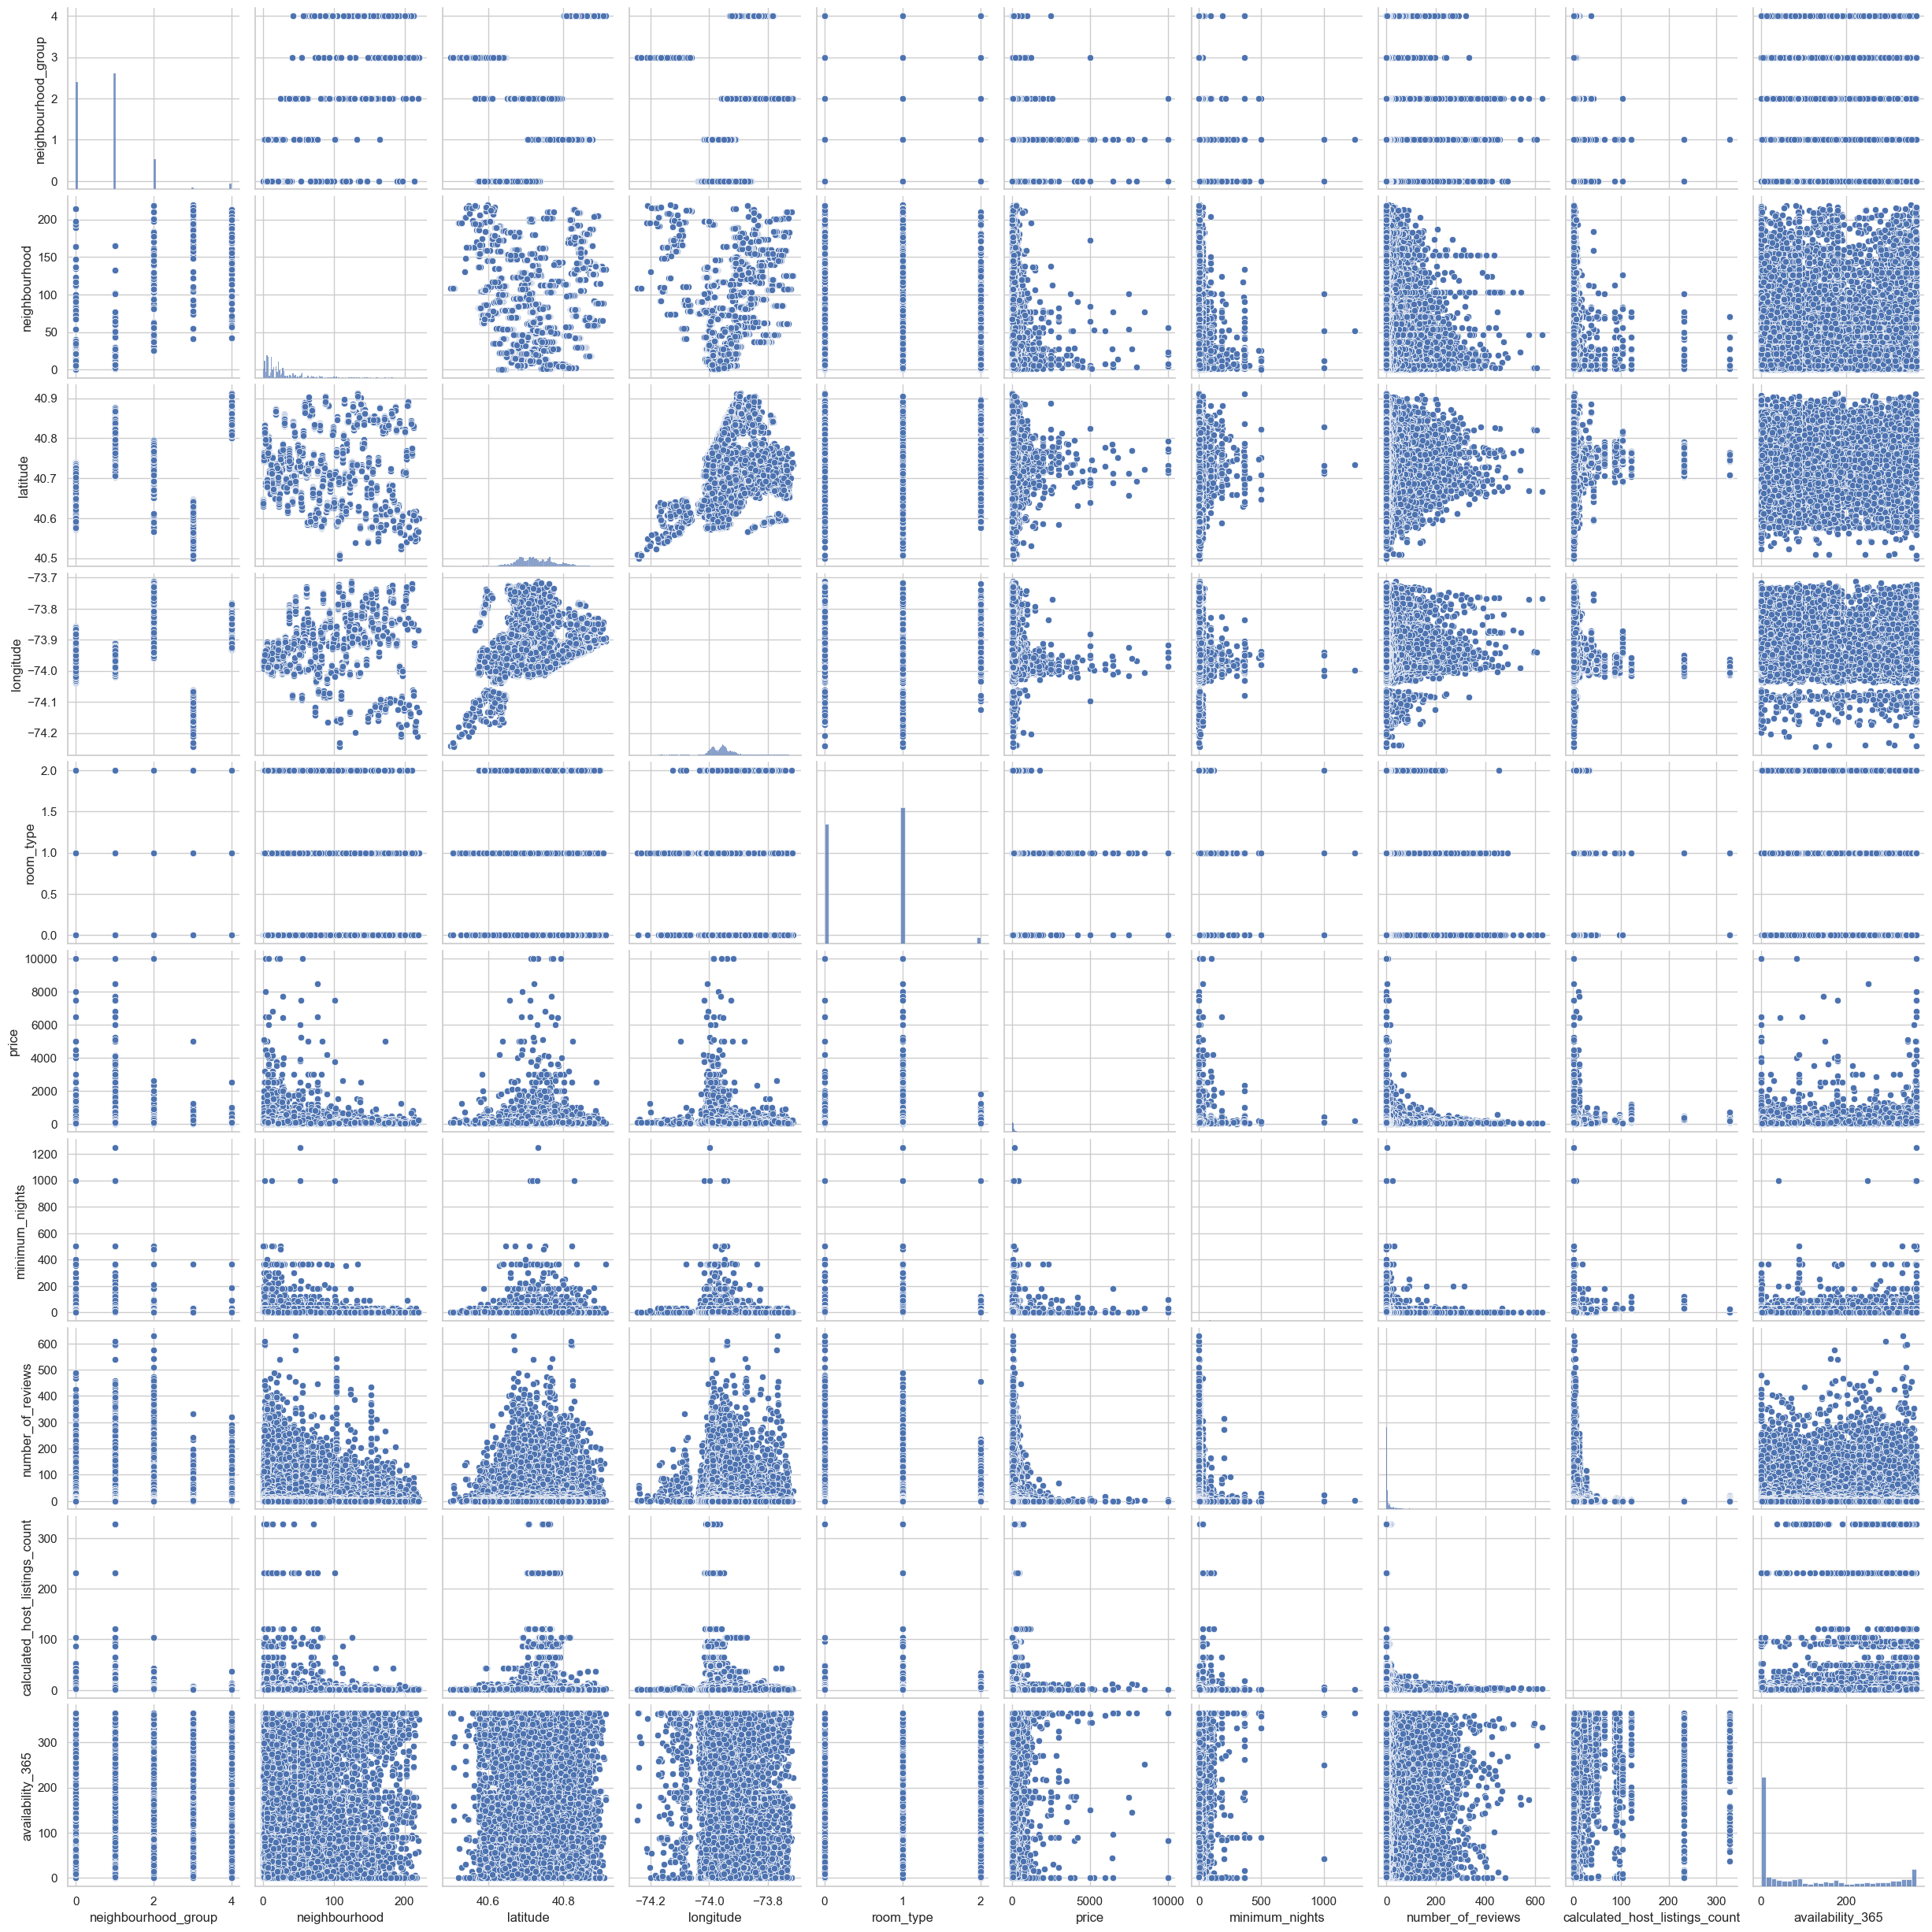

In [14]:
sns.pairplot(data = interim_data)

**Price vs otras variables:**
- No se observa una relación lineal clara con ninguna variable.
- Hay mucha dispersión y concentración en valores bajos, con algunos outliers muy por encima.
- Esto refuerza lo visto en el heatmap: las correlaciones lineales con price son débiles.

**Multicolinealidad baja**
- No se observan patrones diagonales o elípticos entre pares de variables (excepto lat-lon).
- Esto sugiere que las variables no están muy correlacionadas entre sí → baja multicolinealidad.

## Paso 5: Ingeniería de características

### Análisis de outliers

In [15]:
interim_data.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


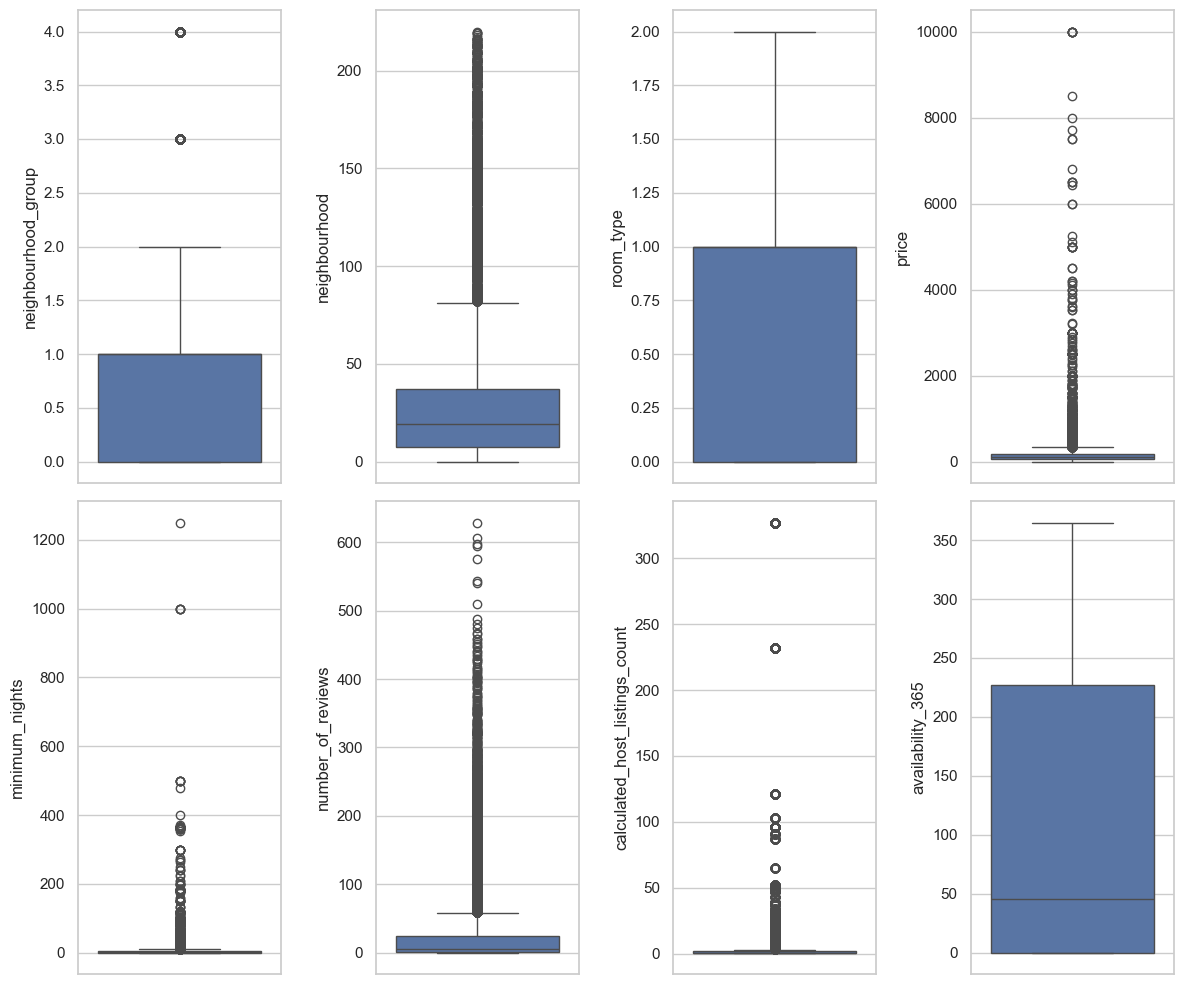

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], data=interim_data, y = "neighbourhood_group")
sns.boxplot(ax=axes[0, 1], data=interim_data, y = "neighbourhood")
sns.boxplot(ax=axes[0, 2], data=interim_data, y = "room_type")
sns.boxplot(ax=axes[0, 3], data=interim_data, y = "price")
sns.boxplot(ax=axes[1, 0], data=interim_data, y = "minimum_nights")
sns.boxplot(ax=axes[1, 1], data=interim_data, y = "number_of_reviews")
sns.boxplot(ax=axes[1, 2], data=interim_data, y = "calculated_host_listings_count")
sns.boxplot(ax=axes[1, 3], data=interim_data, y = "availability_365")

plt.tight_layout()
plt.show()

*Identificación de outliers para `price`*

In [17]:
# Resumen estadístico

price_stats = interim_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [18]:
# IQR para Price

IQR = price_stats["75%"] - price_stats["25%"]
Q3 = price_stats["75%"] + 1.5 * IQR
Q1 = price_stats["25%"] - 1.5 * IQR

print(f"The upper and lower limits are {round(Q3, 2)} and {round(Q1, 2)}, with an interquartile range of {round(IQR, 2)}")

The upper and lower limits are 334.0 and -90.0, with an interquartile range of 106.0


In [19]:
# Contar cuántos valores de price son menores a 0

len(interim_data[interim_data["price"]<0])

0

In [20]:
# Contar cuántos valores de price son iguales a 0

len(interim_data[interim_data["price"]==0])

11

In [21]:
interim_data[interim_data["price"]==0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,0,6,40.69023,-73.95428,0,0,4,1,4,28
25433,4,168,40.83296,-73.88668,0,0,2,55,4,127
25634,0,21,40.69467,-73.92433,0,0,2,16,5,0
25753,0,20,40.72462,-73.94072,0,0,2,12,2,0
25778,0,12,40.70838,-73.94645,1,0,5,3,1,73
25794,0,6,40.68173,-73.91342,0,0,1,93,6,176
25795,0,6,40.68279,-73.91170,0,0,1,95,6,232
25796,0,6,40.68258,-73.91284,0,0,1,95,6,222
26259,1,5,40.75091,-73.97597,1,0,3,0,1,0
26841,0,21,40.69211,-73.90670,2,0,30,2,6,333


In [22]:
# Contar cuántos valores de price son mayores a 334

len(interim_data[interim_data["price"]>334])

2972

In [23]:
# Limpiar los valores atípicos

price_median = price_stats["50%"]

interim_data.loc[interim_data["price"] == 0, "price"] = price_median

In [24]:
count_0 = interim_data[interim_data["price"] == 0].shape[0]

print("Count of 0: ", count_0)

Count of 0:  0


*Identificación de outliers para `minimum_nights`*

In [25]:
# Resumen estadístico

minimum_nights_stats = interim_data["minimum_nights"].describe()
minimum_nights_stats

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [26]:
# IQR para "minimum_nights"

IQR = minimum_nights_stats["75%"] - minimum_nights_stats["25%"]
Q3 = minimum_nights_stats["75%"] + 1.5 * IQR
Q1 = minimum_nights_stats["25%"] - 1.5 * IQR

print(f"The upper and lower limits are {round(Q3, 2)} and {round(Q1, 2)}, with an interquartile range of {round(IQR, 2)}")

The upper and lower limits are 11.0 and -5.0, with an interquartile range of 4.0


In [27]:
# Contar cuántos valores de "minimum_nights" son mayores a 11

len(interim_data[interim_data["minimum_nights"]>11])

6607

In [28]:
interim_data[interim_data["minimum_nights"]>11]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
6,0,6,40.68688,-73.95596,0,60,45,49,1,0
14,1,11,40.73530,-74.00525,1,120,90,27,1,0
29,1,19,40.72920,-73.98542,1,180,14,29,1,67
36,0,6,40.68876,-73.94312,0,35,60,0,1,365
45,0,24,40.65944,-73.96238,1,150,29,11,1,95
...,...,...,...,...,...,...,...,...,...,...
48810,1,8,40.79952,-73.96003,0,75,30,0,1,90
48843,0,6,40.69635,-73.93743,0,45,29,0,2,341
48871,1,2,40.82233,-73.94687,0,35,29,0,2,31
48879,0,12,40.71728,-73.94394,1,120,20,0,1,22


In [29]:
# Limpiar los valores atípicos

minimum_nights_median = minimum_nights_stats["50%"]

interim_data.loc[interim_data["minimum_nights"] > 15, "minimum_nights"] = minimum_nights_median

*Identificación de outliers para `number_of_reviews`*

In [30]:
# Resumen estadístico

number_of_reviews_stats = interim_data["number_of_reviews"].describe()
number_of_reviews_stats

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [31]:
# IQR para "number_of_reviews"

IQR = number_of_reviews_stats["75%"] - number_of_reviews_stats["25%"]
Q3 = number_of_reviews_stats["75%"] + 1.5 * IQR
Q1 = number_of_reviews_stats["25%"] - 1.5 * IQR

print(f"The upper and lower limits are {round(Q3, 2)} and {round(Q1, 2)}, with an interquartile range of {round(IQR, 2)}")

The upper and lower limits are 58.5 and -33.5, with an interquartile range of 23.0


*Identificación de outliers para `calculated_host_listings_count`*

In [32]:
# Resumen estadístico

calculated_host_listings_count_stats = interim_data["calculated_host_listings_count"].describe()
calculated_host_listings_count_stats

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [33]:
# IQR para "calculated_host_listings_count"

IQR = calculated_host_listings_count_stats["75%"] - calculated_host_listings_count_stats["25%"]
Q3 = calculated_host_listings_count_stats["75%"] + 1.5 * IQR
Q1 = calculated_host_listings_count_stats["25%"] - 1.5 * IQR

print(f"The upper and lower limits are {round(Q3, 2)} and {round(Q1, 2)}, with an interquartile range of {round(IQR, 2)}")

The upper and lower limits are 3.5 and -0.5, with an interquartile range of 1.0


In [34]:
# Contar cuántos valores de "calculated_host_listings_count" son mayores a 4

len(interim_data[interim_data["calculated_host_listings_count"]>4])

5641

In [35]:
interim_data[interim_data["calculated_host_listings_count"]>4]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,149,1,9,6,365
21,0,16,40.68069,-73.97706,0,130,2,130,6,347
22,0,16,40.67989,-73.97798,0,80,1,39,6,364
23,0,16,40.68001,-73.97865,0,110,2,71,6,304
92,0,3,40.68634,-73.96600,0,98,7,16,6,185
...,...,...,...,...,...,...,...,...,...,...
48857,2,129,40.69482,-73.86618,1,85,3,0,6,300
48867,0,67,40.59080,-73.97116,2,25,1,0,6,338
48868,0,67,40.59118,-73.97119,2,25,7,0,6,365
48878,2,81,40.74477,-73.87727,0,45,1,0,5,172


In [36]:
# Limpiar los valores atípicos

calculated_host_listings_count_median = calculated_host_listings_count_stats["50%"]

interim_data.loc[interim_data["calculated_host_listings_count"] > 4, "calculated_host_listings_count"] = calculated_host_listings_count_median

### Inferencia de nuevas características

In [37]:
from geopy.distance import geodesic

# Coordenada central (Times Square, NYC)
ref_point = (40.7580, -73.9855)

interim_data["distance_to_center"] = interim_data.apply(
    lambda row: geodesic((row["latitude"], row["longitude"]), ref_point).km, axis=1
)

### Análisis de valores faltantes

In [38]:
# Count NaN

interim_data.isnull().sum().sort_values(ascending = False) / len(interim_data)

neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
distance_to_center                0.0
dtype: float64

### Escalado de valores

In [39]:
from sklearn.model_selection import train_test_split

num_variables = ["neighbourhood_group", "neighbourhood", "room_type", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365", "distance_to_center"]

# Dividimos el conjunto de datos en muestras de train y test
X = interim_data.drop("price", axis = 1)[num_variables]
y = interim_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_center
32645,0,12,1,3,11,1,1,5.338508
23615,1,30,0,2,2,1,0,10.813721
31183,0,6,0,2,0,2,0,7.872477
29260,0,6,1,3,87,1,267,9.386149
7275,2,31,0,5,13,1,0,7.685401


*Normalización*

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_to_center
32645,-0.931915,-0.514100,0.798949,0.013388,-0.277198,-0.473827,-0.852862,-0.395996
23615,0.256169,0.005517,-1.050482,-0.413075,-0.479451,-0.473827,-0.860447,0.836717
31183,-0.931915,-0.687306,-1.050482,-0.413075,-0.524396,0.917736,-0.860447,0.174513
29260,-0.931915,-0.687306,0.798949,0.013388,1.430714,-0.473827,1.164663,0.515307
7275,1.444253,0.034385,-1.050482,0.866315,-0.232253,-0.473827,-0.860447,0.132394


## Paso 6: Selección de características

In [41]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 3 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

In [42]:
X_train_sel.head()

,neighbourhood,room_type,calculated_host_listings_count,availability_365,distance_to_center
0,12.0,1.0,1.0,1.0,5.338508
1,30.0,0.0,1.0,0.0,10.813721
2,6.0,0.0,2.0,0.0,7.872477
3,6.0,1.0,1.0,267.0,9.386149
4,31.0,0.0,1.0,0.0,7.685401


In [43]:
X_test_sel.head()

,neighbourhood,room_type,calculated_host_listings_count,availability_365,distance_to_center
0,0.0,1.0,1.0,189.0,12.727347
1,44.0,0.0,1.0,73.0,8.694661
2,7.0,0.0,1.0,0.0,0.527235
3,43.0,1.0,1.0,272.0,5.978916
4,4.0,1.0,1.0,30.0,6.172081


### Save the clean data

In [44]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-machine-learning-python-template/data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-machine-learning-python-template/data/processed/clean_test.csv", index = False)